# Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

In [1]:
import pandas as pd #importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the datset
df = pd.read_csv('Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.head() #first 5 rows of the data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail() #last 5 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
df.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5585,4667-OHGKG,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.3,19.3,Yes


In [7]:
df.shape

(7043, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
# Changing the datatype of the column 'TotalCharges' from Object to float and replacing the blank values with NaN
df["TotalCharges"]=df["TotalCharges"].apply(lambda x: float(x) if len(x)>1 else np.nan)

# Checking for the missing values again:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df.isnull().sum() #finding null values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<AxesSubplot:>

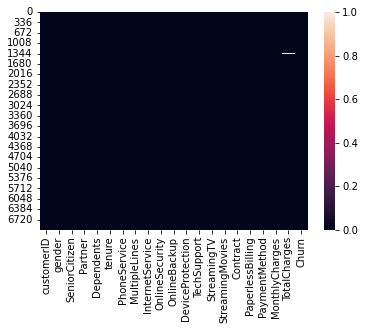

In [12]:
sns.heatmap(df.isnull())

In [13]:
# Let's locate the rows of the 'TotalCharges' column which contain missing values:

df.loc[df['TotalCharges'].isna(),['tenure', 'MonthlyCharges', 'TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


In [14]:
# Since the value of 'tenure' is 0 so we'll replace the missing values of the 'TotalCharges' column with 0.

df['TotalCharges'].fillna(0, inplace=True)

# Uniqueness of the data

In [15]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [16]:
df.TotalCharges.unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [17]:
df.MonthlyCharges.unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [18]:
df.PaymentMethod.unique()


array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [19]:
df.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

In [20]:
df.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

# DATA VISUALIZATION

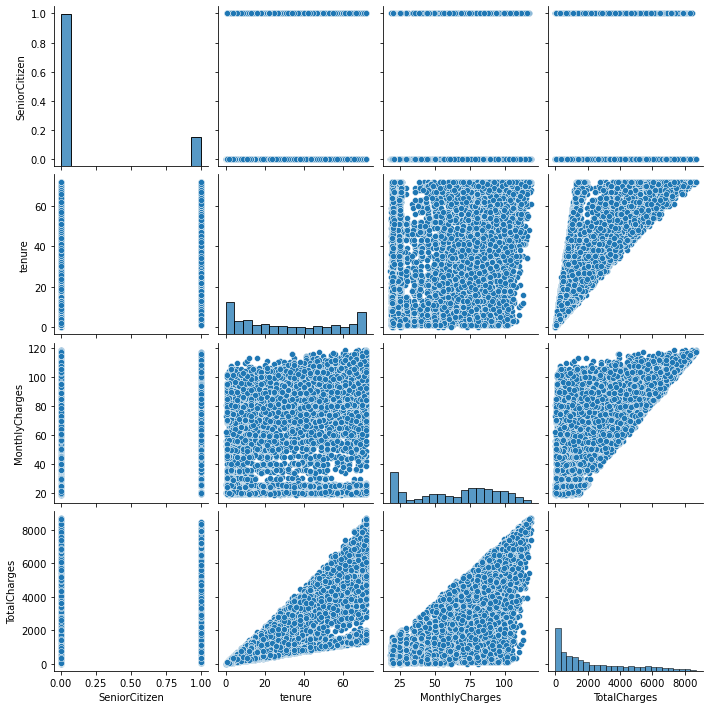

In [21]:
 sns.pairplot(df)

In [22]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.103006
tenure,0.016567,1.000000,0.247900,0.826178
MonthlyCharges,0.220173,0.247900,1.000000,0.651174
TotalCharges,0.103006,0.826178,0.651174,1.000000


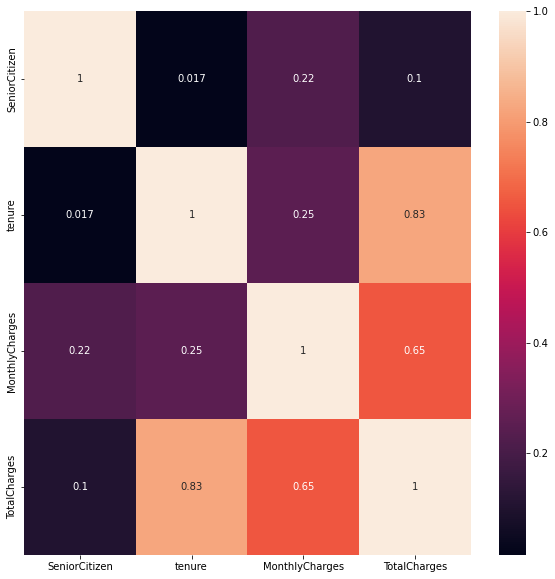

In [23]:
corr_hmap=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_hmap,annot=True)
plt.show()

SeniorCitizen        AxesSubplot(0.125,0.125;0.065678x0.755)
tenure            AxesSubplot(0.203814,0.125;0.065678x0.755)
MonthlyCharges    AxesSubplot(0.282627,0.125;0.065678x0.755)
TotalCharges      AxesSubplot(0.361441,0.125;0.065678x0.755)
dtype: object

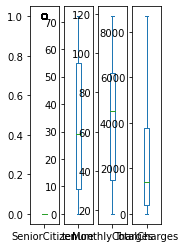

In [24]:
df.plot(kind='box',subplots=True, layout=(1,10))

<AxesSubplot:>

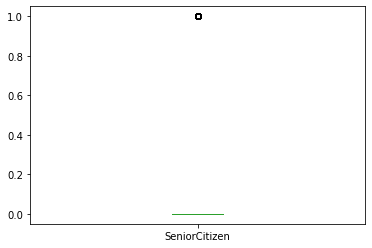

In [25]:
df['SeniorCitizen'].plot.box()

<AxesSubplot:>

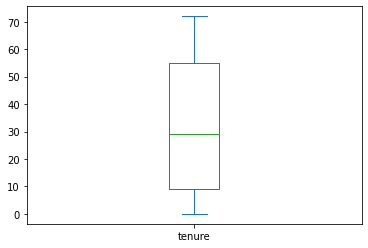

In [26]:
df['tenure'].plot.box()

<AxesSubplot:>

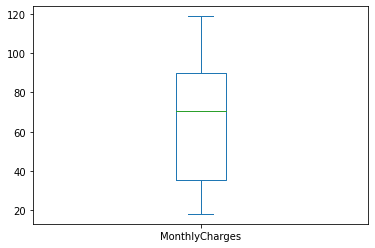

In [27]:
df['MonthlyCharges'].plot.box()

<AxesSubplot:>

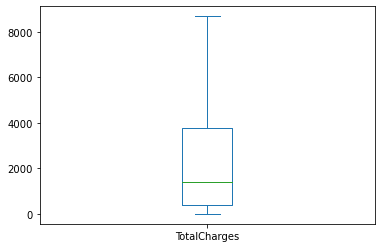

In [28]:
df['TotalCharges'].plot.box()

In [29]:
# Checking for the value counts of the target column

df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Target Column Distribution')

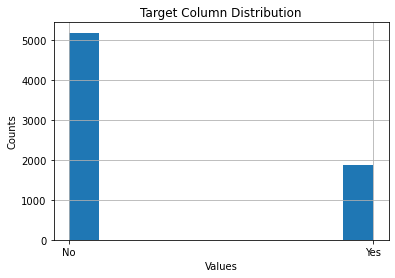

In [30]:
# Plotting histogram to show the distribution of target columnn

plt.figure(figsize=[6,4])
df['Churn'].hist(grid=True)
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Target Column Distribution')

# 'GENDER'Column

In [31]:
# Checking for the value counts of the 'gender' column

df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

<AxesSubplot:ylabel='gender'>

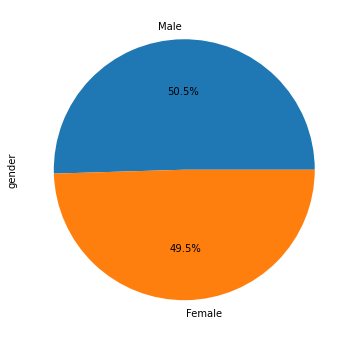

In [32]:
# Plotting pie plot to show the distribution of gender column

plt.figure(figsize=[6,6])
df['gender'].value_counts().plot.pie(autopct = '%.1f%%')

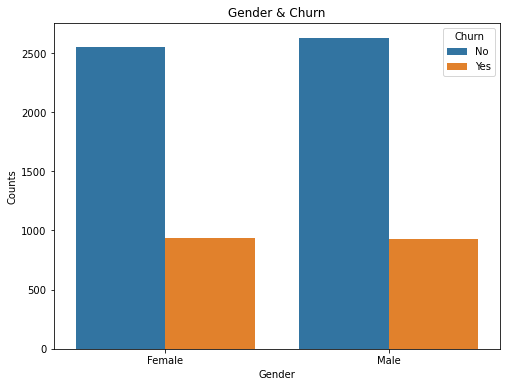

In [33]:
# Checking for the gender wise distribution of the target column

plt.figure(figsize=[8,6])
sns.countplot(x=df['gender'], hue=df['Churn'], data=df)
plt.title('Gender & Churn')
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.show()

# 'SENIOR CITIZEN'Column

In [34]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

<AxesSubplot:ylabel='SeniorCitizen'>

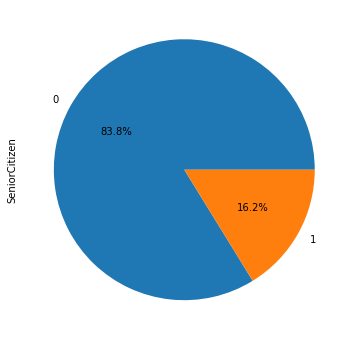

In [35]:
plt.figure(figsize=[6,6])
df['SeniorCitizen'].value_counts().plot.pie( autopct = '%0.1f%%')

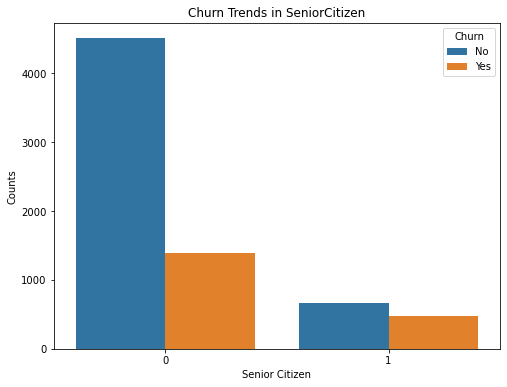

In [36]:
plt.figure(figsize=[8,6])
sns.countplot(x=df['SeniorCitizen'], hue=df['Churn'], data=df)
plt.xlabel('Senior Citizen')
plt.ylabel('Counts')
plt.title('Churn Trends in SeniorCitizen')
plt.show()

# 'PHONE SERVICE'Column

In [37]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

<AxesSubplot:ylabel='PhoneService'>

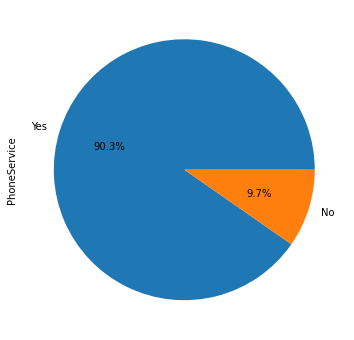

In [38]:
plt.figure(figsize=[6,6])
df['PhoneService'].value_counts().plot.pie( autopct = '%0.1f%%')

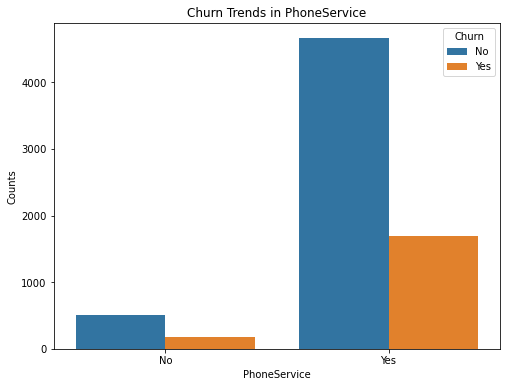

In [39]:
plt.figure(figsize=[8,6])
sns.countplot(x=df['PhoneService'], hue=df['Churn'], data=df)
plt.xlabel('PhoneService')
plt.ylabel('Counts')
plt.title('Churn Trends in PhoneService')
plt.show()

# MULTIPLELINES COLUUMN

<AxesSubplot:ylabel='MultipleLines'>

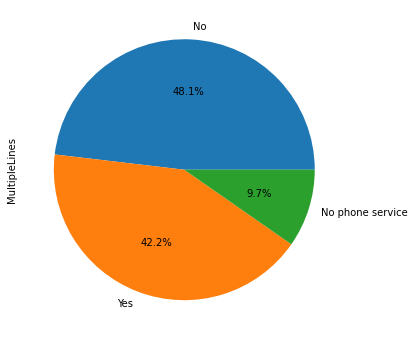

In [40]:
plt.figure(figsize=[6,6])
df['MultipleLines'].value_counts().plot.pie( autopct = '%0.1f%%')

<AxesSubplot:ylabel='InternetService'>

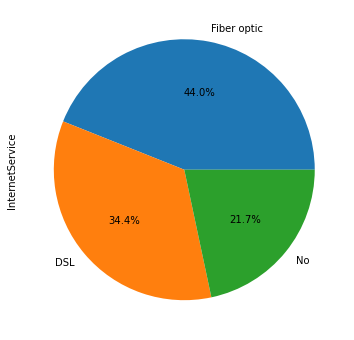

In [41]:
plt.figure(figsize=[6,6])
df['InternetService'].value_counts().plot.pie( autopct = '%0.1f%%')

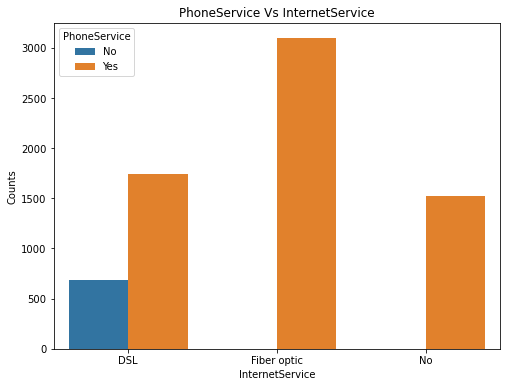

In [42]:
# checking the relation between phone service and internetservice

plt.figure(figsize=[8,6])
sns.countplot(x=df['InternetService'], hue=df['PhoneService'], data=df)
plt.title('PhoneService Vs InternetService')
plt.ylabel('Counts')

plt.show()

# "ONLINE SECURITY" COLUMN

<AxesSubplot:ylabel='OnlineSecurity'>

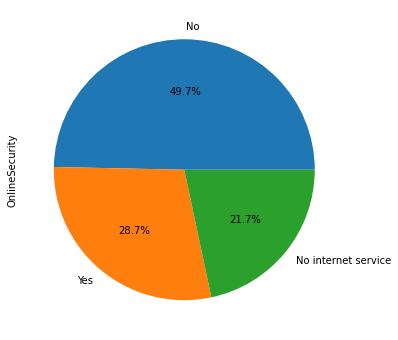

In [43]:
plt.figure(figsize=[6,6])
df['OnlineSecurity'].value_counts().plot.pie( autopct = '%0.1f%%')

<AxesSubplot:ylabel='OnlineBackup'>

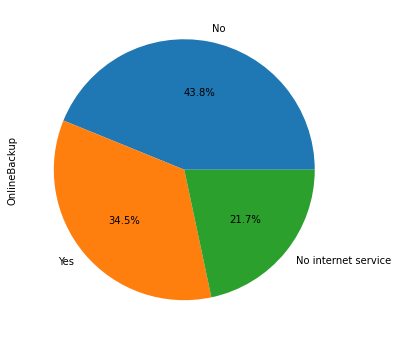

In [44]:
plt.figure(figsize=[6,6])
df['OnlineBackup'].value_counts().plot.pie( autopct = '%0.1f%%')

# "DEVICEPROTECTION"COLUMN

<AxesSubplot:ylabel='DeviceProtection'>

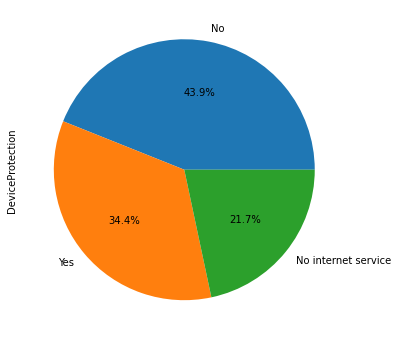

In [45]:
plt.figure(figsize=[6,6])
df['DeviceProtection'].value_counts().plot.pie( autopct = '%0.1f%%')

# TECHSUPPORT COLUMN

<AxesSubplot:ylabel='TechSupport'>

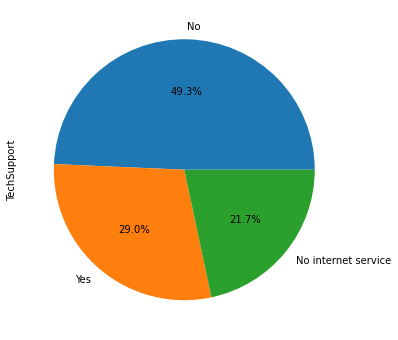

In [46]:
plt.figure(figsize=[6,6])
df['TechSupport'].value_counts().plot.pie( autopct = '%0.1f%%')

# STREAMINGTV COLUMN

<AxesSubplot:ylabel='StreamingTV'>

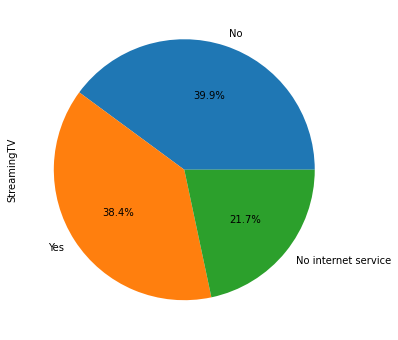

In [47]:
plt.figure(figsize=[6,6])
df['StreamingTV'].value_counts().plot.pie( autopct = '%0.1f%%')

<AxesSubplot:ylabel='StreamingMovies'>

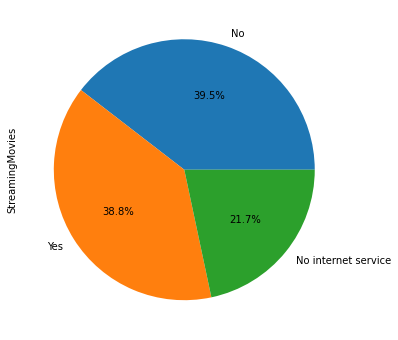

In [48]:
plt.figure(figsize=[6,6])
df['StreamingMovies'].value_counts().plot.pie( autopct = '%0.1f%%')

# CONTRACT COLUMN

<AxesSubplot:ylabel='Contract'>

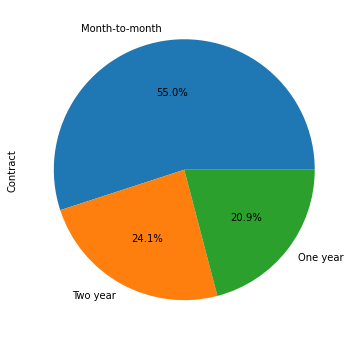

In [49]:
plt.figure(figsize=[6,6])
df['Contract'].value_counts().plot.pie( autopct = '%0.1f%%')

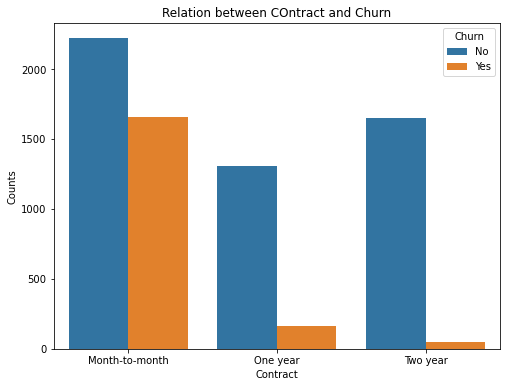

In [50]:
# Let's check the relationship between 'Customer churn' and 'Contract'

plt.figure(figsize=[8,6])
sns.countplot(x=df['Contract'], hue=df['Churn'], data=df)
plt.title('Relation between COntract and Churn')
plt.ylabel('Counts')
plt.xlabel('Contract')
plt.show()

<AxesSubplot:ylabel='PaperlessBilling'>

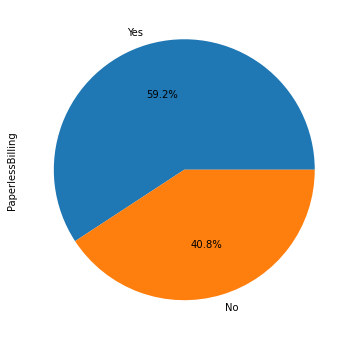

In [51]:
plt.figure(figsize=[6,6])
df['PaperlessBilling'].value_counts().plot.pie( autopct = '%0.1f%%')

# PAYMENTMETHOD COLUMN

<AxesSubplot:ylabel='PaymentMethod'>

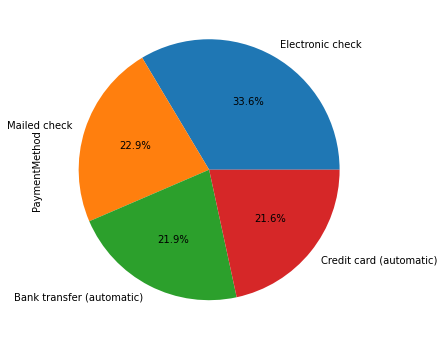

In [52]:
plt.figure(figsize=[6,6])
df['PaymentMethod'].value_counts().plot.pie( autopct = '%0.1f%%')

# LABEL ENCODING FOR CONVERTING CATEGORICAL TO NUMERICAL COLUMNS

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [54]:
# Label encoding the 'customerID' column
le.fit(df['customerID'].drop_duplicates())
le.classes_
df['customerID'] = le.transform(df['customerID'])

In [55]:
# Label encoding the 'Gender' column

le.fit(df['gender'].drop_duplicates())
le.classes_
df['gender'] = le.transform(df['gender'])

In [56]:
# Label encoding the 'Partner' column

le.fit(df['Partner'].drop_duplicates())
le.classes_
df['Partner'] = le.transform(df['Partner'])

In [57]:
# Label encoding the 'Dependents' column

le.fit(df['Dependents'].drop_duplicates())
le.classes_
df['Dependents'] = le.transform(df['Dependents'])

In [58]:
# Label encoding the 'PhoneService' column

le.fit(df['PhoneService'].drop_duplicates())
le.classes_
df['PhoneService'] = le.transform(df['PhoneService'])

In [59]:
# Label encoding the 'MultipleLines' column

le.fit(df['MultipleLines'].drop_duplicates())
le.classes_
df['MultipleLines'] = le.transform(df['MultipleLines'])

In [60]:
# Label encoding the 'InternetService' column

le.fit(df['InternetService'].drop_duplicates())
le.classes_
df['InternetService'] = le.transform(df['InternetService'])

In [61]:
# label encoding the 'OnlineSecurity' column

le.fit(df['OnlineSecurity'].drop_duplicates())
le.classes_
df['OnlineSecurity'] = le.transform(df['OnlineSecurity'])

In [62]:
# Label encoding the 'OnlineBackup' column

le.fit(df['OnlineBackup'].drop_duplicates())
le.classes_
df['OnlineBackup'] = le.transform(df['OnlineBackup'])

In [63]:
# Label encoding the 'DeviceProtection' column

le.fit(df['DeviceProtection'].drop_duplicates())
le.classes_
df['DeviceProtection'] = le.transform(df['DeviceProtection'])

In [64]:
# Label encoding the 'TechSupport' column

le.fit(df['TechSupport'].drop_duplicates())
le.classes_
df['TechSupport'] = le.transform(df['TechSupport'])

In [65]:
# Label encoding the 'StreamingTV' column

le.fit(df['StreamingTV'].drop_duplicates())
le.classes_
df['StreamingTV'] = le.transform(df['StreamingTV'])

In [66]:
# Label encoding the 'StreamingMovies' column

le.fit(df['StreamingMovies'].drop_duplicates())
le.classes_
df['StreamingMovies'] = le.transform(df['StreamingMovies'])

In [67]:
# Label encoding the 'Contract' column

le.fit(df['Contract'].drop_duplicates())
le.classes_
df['Contract'] = le.transform(df['Contract'])

In [68]:
# Label encoding the 'PaperlessBilling' column

le.fit(df['PaperlessBilling'].drop_duplicates())
le.classes_
df['PaperlessBilling'] = le.transform(df['PaperlessBilling'])

In [69]:
# Label encoding the 'PaymentMethod' column

le.fit(df['PaymentMethod'].drop_duplicates())
le.classes_
df['PaymentMethod'] = le.transform(df['PaymentMethod'])

In [70]:
# Label encoding the 'Churn' column 

le.fit(df['Churn'].drop_duplicates())
le.classes_
df['Churn'] = le.transform(df['Churn'])


In [71]:
# checking the dataset after labelencoding
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


array([[<AxesSubplot:title={'center':'customerID'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'Partner'}>],
       [<AxesSubplot:title={'center':'Dependents'}>,
        <AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'PhoneService'}>,
        <AxesSubplot:title={'center':'MultipleLines'}>],
       [<AxesSubplot:title={'center':'InternetService'}>,
        <AxesSubplot:title={'center':'OnlineSecurity'}>,
        <AxesSubplot:title={'center':'OnlineBackup'}>,
        <AxesSubplot:title={'center':'DeviceProtection'}>],
       [<AxesSubplot:title={'center':'TechSupport'}>,
        <AxesSubplot:title={'center':'StreamingTV'}>,
        <AxesSubplot:title={'center':'StreamingMovies'}>,
        <AxesSubplot:title={'center':'Contract'}>],
       [<AxesSubplot:title={'center':'PaperlessBilling'}>,
        <AxesSubplot:title={'center':'PaymentMethod'}>,
        <AxesS

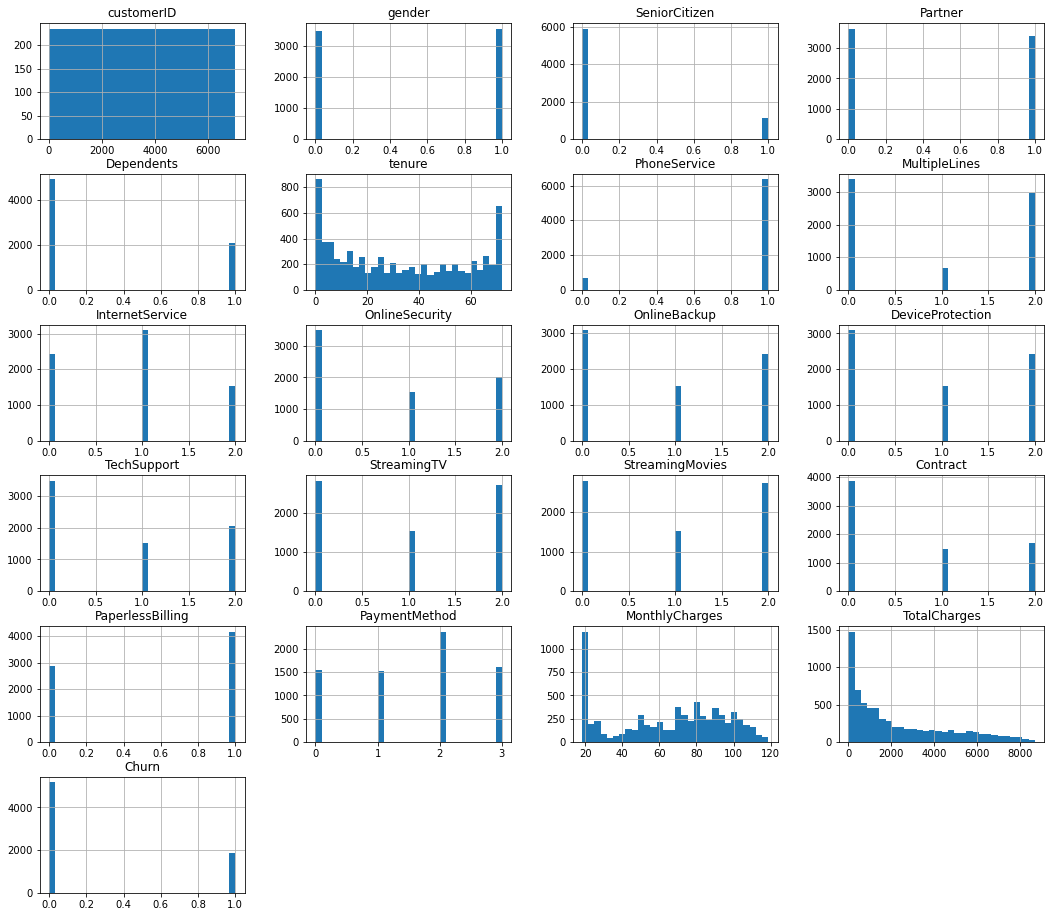

In [72]:
df.hist(figsize=[18,16], grid=True, layout=(6,4), bins=30)

In [73]:
df.describe() # statsistical summary

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2279.734304,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2266.794470,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,398.550000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1394.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


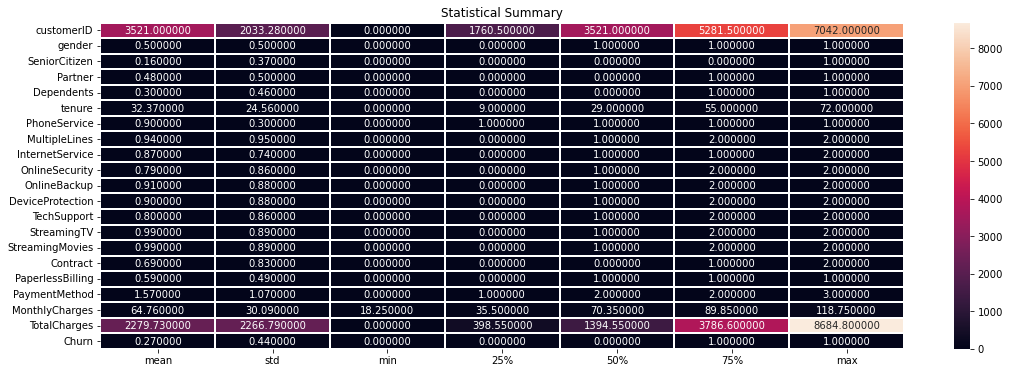

In [74]:
# Plotting Heatmap for Statistical Summary

plt.figure(figsize=[18,6])
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=True, linewidths=0.25, linecolor='white', fmt='f')
plt.title('Statistical Summary')
plt.show()

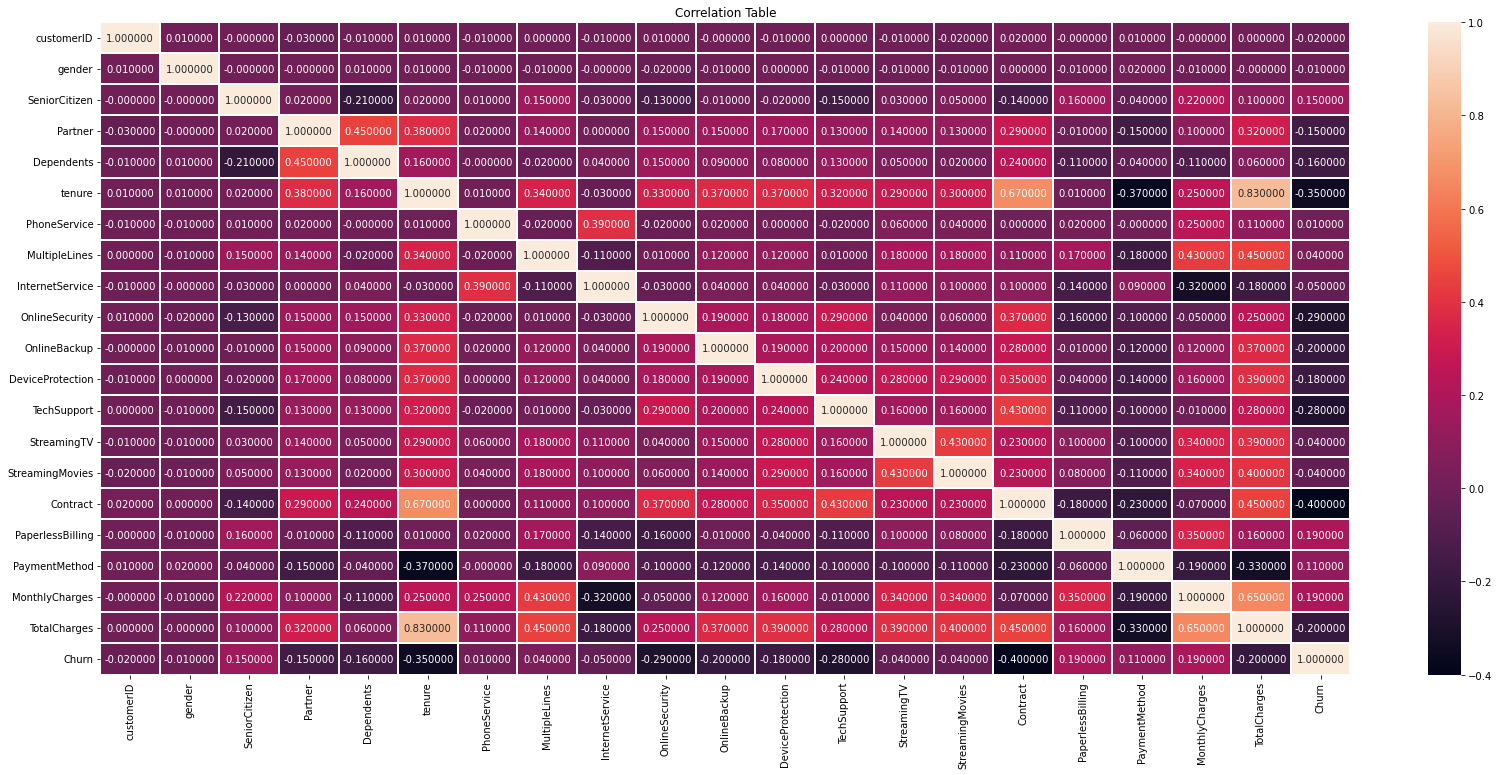

In [75]:
# Plotting heatmap for the correlation table

plt.figure(figsize=[28,12])
sns.heatmap(round(df.corr().transpose(),2), annot=True, linewidths=0.25, linecolor='white', fmt='f')
plt.title('Correlation Table')
plt.show()

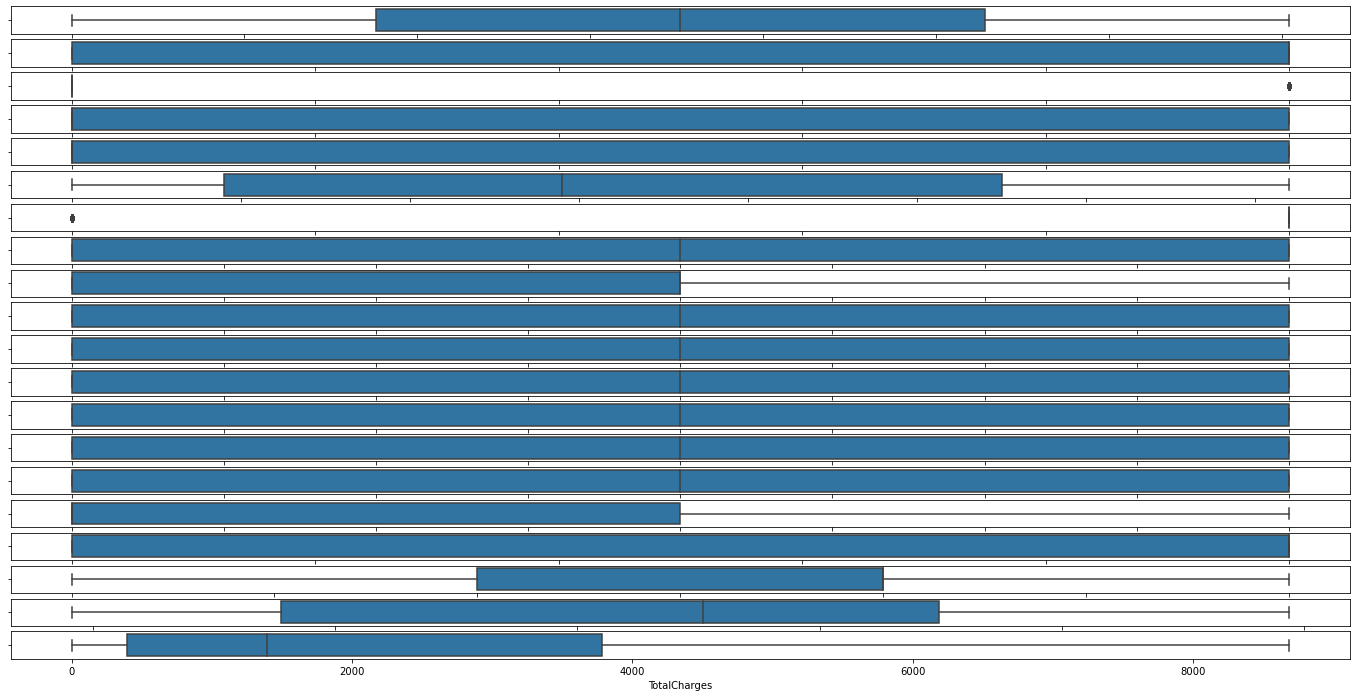

In [76]:
# Plotting boxplot to check the outliers
fig, axs = plt.subplots(20, figsize=[24,12])

plt1 = sns.boxplot(df['customerID'], ax=axs[0])
plt2 = sns.boxplot(df['gender'], ax = axs[1])
plt3 = sns.boxplot(df['SeniorCitizen'], ax = axs[2])
plt4 = sns.boxplot(df['Partner'], ax=axs[3])
plt5 = sns.boxplot(df['Dependents'], ax = axs[4])
plt6 = sns.boxplot(df['tenure'], ax= axs[5])
plt7 = sns.boxplot(df['PhoneService'], ax = axs[6])
plt8 = sns.boxplot(df['MultipleLines'], ax= axs[7])
plt9 = sns.boxplot(df['InternetService'], ax = axs[8])
plt10 = sns.boxplot(df['OnlineSecurity'], ax = axs[9])
plt11 = sns.boxplot(df['OnlineBackup'], ax = axs[10])
plt12 = sns.boxplot(df['DeviceProtection'], ax = axs[11])
plt13 = sns.boxplot(df['TechSupport'], ax =axs[12])
plt14 = sns.boxplot(df['StreamingTV'], ax =axs[13])
plt15 = sns.boxplot(df['StreamingMovies'], ax = axs[14])
plt16 = sns.boxplot(df['Contract'], ax = axs[15])
plt17 = sns.boxplot(df['PaperlessBilling'], ax = axs[16])
plt18 = sns.boxplot(df['PaymentMethod'], ax = axs[17])
plt19 = sns.boxplot(df['MonthlyCharges'], ax = axs[18])
plt20 = sns.boxplot(df['TotalCharges'], ax =axs[19])

In [77]:
df.skew() #checking the skewness

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.963235
Churn               1.063031
dtype: float64

# REMOVING SKEWNESS USING POWER TRANSFORM

In [78]:
# Splitting the dataset into feature and vector:

x = df.drop(['Churn'], axis =1)
y = df['Churn']

In [79]:
from sklearn.preprocessing import power_transform

x = power_transform(x)
x

array([[ 0.90147756, -1.00955867, -0.43991649, ...,  0.40968472,
        -1.1585412 , -1.79299643],
       [ 0.30015243,  0.99053183, -0.43991649, ...,  1.31889872,
        -0.23949171,  0.25480918],
       [-0.36143839,  0.99053183, -0.43991649, ...,  1.31889872,
        -0.34266505, -1.37517297],
       ...,
       [ 0.02864988, -1.00955867, -0.43991649, ...,  0.40968472,
        -1.16724064, -0.85276427],
       [ 1.12611817,  0.99053183,  2.27315869, ...,  1.31889872,
         0.33431207, -0.91533153],
       [-0.53606758,  0.99053183, -0.43991649, ..., -1.48983732,
         1.33886338,  1.48509473]])

# STANDARD SCALER

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = scaler.fit_transform(x)
x

array([[ 0.90147756, -1.00955867, -0.43991649, ...,  0.40968472,
        -1.1585412 , -1.79299643],
       [ 0.30015243,  0.99053183, -0.43991649, ...,  1.31889872,
        -0.23949171,  0.25480918],
       [-0.36143839,  0.99053183, -0.43991649, ...,  1.31889872,
        -0.34266505, -1.37517297],
       ...,
       [ 0.02864988, -1.00955867, -0.43991649, ...,  0.40968472,
        -1.16724064, -0.85276427],
       [ 1.12611817,  0.99053183,  2.27315869, ...,  1.31889872,
         0.33431207, -0.91533153],
       [-0.53606758,  0.99053183, -0.43991649, ..., -1.48983732,
         1.33886338,  1.48509473]])

# SMOTE TECHINIQUE(IMBALANCE DATASET)

In [81]:
from imblearn.over_sampling import SMOTE
Sm = SMOTE()
x_over, y_over = Sm.fit_resample(x,y)

In [82]:
#Checking the value count of the target column after oversampling
y_over.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

# FINDING BEST RANDOM STATE

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [84]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range (0,600):
    x_train, x_test, y_train, y_test = train_test_split(x_over,y_over,test_size=0.2,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print('The best accuracy is ',maxAccu, ' on Random_State ',maxRS)

The best accuracy is  0.8043478260869565  on Random_State  495


In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=409)

# MODEL TRAINING
LOGISTIC REGRESSION

In [86]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

LR.fit(x_train, y_train)
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.7977288857345636
[[925 105]
 [180 199]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1030
           1       0.65      0.53      0.58       379

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



# RANDOM FOREST CLASSIFIER

In [87]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
predRF = RF.predict(x_test)

print(accuracy_score(y_test, predRF))
print(confusion_matrix(y_test, predRF))
print(classification_report(y_test, predRF))

0.794889992902768
[[937  93]
 [196 183]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1030
           1       0.66      0.48      0.56       379

    accuracy                           0.79      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



# DECISIONTREE CLASSIFIER

In [88]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
predDT = DT.predict(x_test)

print(accuracy_score(y_test, predDT))
print(confusion_matrix(y_test, predDT))
print(classification_report(y_test, predDT))

0.7281760113555713
[[838 192]
 [191 188]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1030
           1       0.49      0.50      0.50       379

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409



# SVC

In [89]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.7991483321504613
[[939  91]
 [192 187]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1030
           1       0.67      0.49      0.57       379

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



# CROSS VALIDATION

In [90]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR, x, y, cv=5)
print("Cross Validation Score for LogisticRegression is ", scr.mean())

scr = cross_val_score(RF, x, y, cv=5)
print("Cross Validation Score for RandomForestClassifier is ", scr.mean())

scr = cross_val_score(DT, x, y, cv=5)
print("Cross Validation Score for DecisionTreeClassifier is ", scr.mean())

scr = cross_val_score(svc, x, y, cv=5)
print("Cross Validation Score for SVC is ", scr.mean())

Cross Validation Score for LogisticRegression is  0.8067590046132009
Cross Validation Score for RandomForestClassifier is  0.7917100498419253
Cross Validation Score for DecisionTreeClassifier is  0.7279592635008709
Cross Validation Score for SVC is  0.8026440213884767


# HYPERPARAMETER TUNING

In [91]:
from sklearn.model_selection import GridSearchCV

#SVC:
params = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [92]:
GCV = GridSearchCV(SVC(), params, cv=3)

In [93]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [94]:
# Finding the best parameter found by GridSearchCV

GCV.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [95]:
model = SVC(C = 10, gamma = 0.001, kernel = 'rbf')
model.fit(x_train, y_train)
pred = model.predict(x_test)

print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.7955997161107168
[[934  96]
 [192 187]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1030
           1       0.66      0.49      0.56       379

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.78      0.80      0.79      1409



# AUC-ROC CURVE

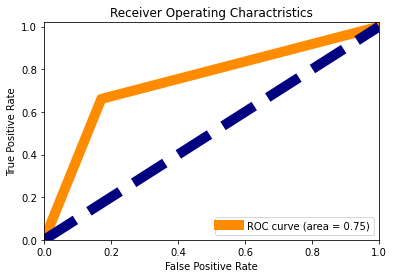

In [96]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color ='darkorange', lw=10, label ='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Charactristics')
plt.legend(loc='lower right')

plt.show()

# SAVING THE MODEL

In [97]:
import pickle
filename = 'customer_churn_analysis.pkl'
pickle.dump(model, open(filename, 'wb'))

# CONCLUSION

In [98]:
a = np.array(y_test)
predicted = np.array(model.predict(x_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_conclusion

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1404,1,1
1405,0,0
1406,1,0
1407,0,0
